# Logistic Regression - Predicting if the email is spam or not

# Directory, libraries, data, 

In [3]:
%cd C:/users/shrav/Data_Analysis_Projects/Datasets/Logistic Regression

C:\users\shrav\Data_Analysis_Projects\Datasets\Logistic Regression


In [4]:
# Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# data 

df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [6]:
print(df['yesno'].unique())

['y' 'n']


In [7]:
df['yesno'] = df['yesno'].str.strip().str.lower()
df['yesno'] = (df['yesno'] == 'y').astype(int)

df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


# Fields 

- **crl.tot** = total length of words in capitals
- **dollar** = number of occurrences of the \$ symbol
- **bang** = number of occurrences of the ! symbol
- **money** = number of occurrences of the word 'money'
- **n000** = number of occurrences of the string '000'
- **make** = number of occurrences of the word 'make'
- **yesno** = outcome variable, a factor with levels n not spam, y spam

# Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crl.tot  4601 non-null   int64  
 1   dollar   4601 non-null   float64
 2   bang     4601 non-null   float64
 3   money    4601 non-null   float64
 4   n000     4601 non-null   float64
 5   make     4601 non-null   float64
 6   yesno    4601 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 233.8 KB


In [9]:
df.describe().round()

,crl.tot,dollar,bang,money,n000,make,yesno
count,4601.0,4601.0,4601.0,4601.0,4601.0,4601.0,4601.0
mean,283.0,0.0,0.0,0.0,0.0,0.0,0.0
std,606.0,0.0,1.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,35.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,95.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,266.0,0.0,0.0,0.0,0.0,0.0,1.0
max,15841.0,6.0,32.0,12.0,5.0,5.0,1.0


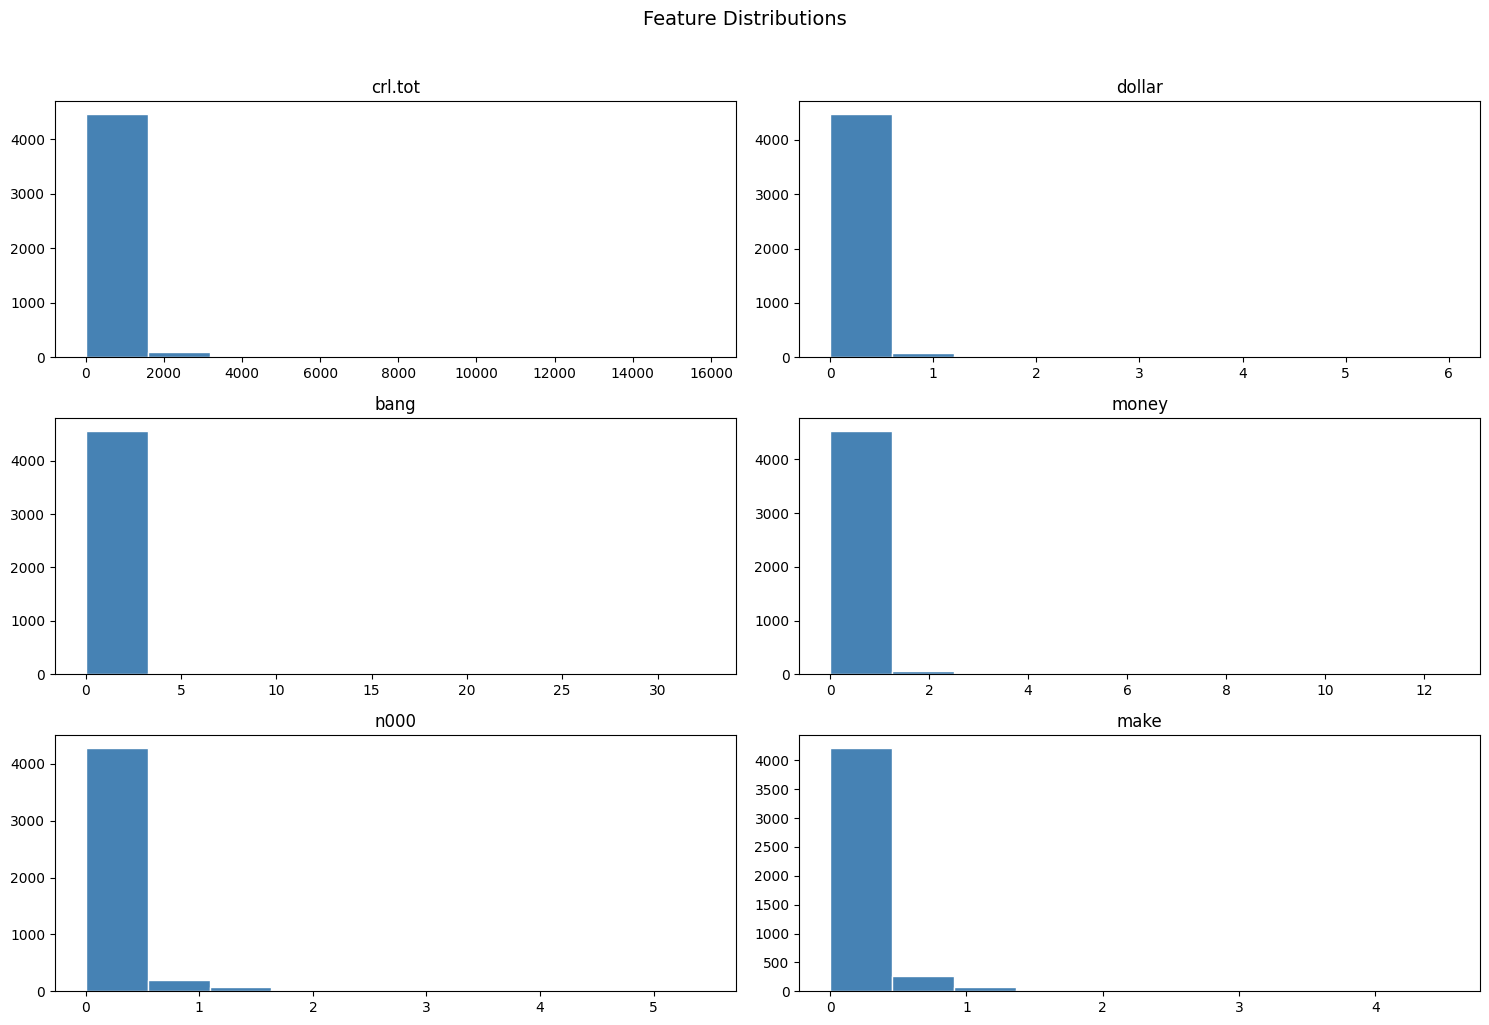

In [10]:
# Check for outliers 

df.drop(columns='yesno').hist(
    figsize=(15, 10),          
    color='steelblue',        
    edgecolor='white',         
    grid=False,                
)

plt.suptitle('Feature Distributions', y=1.02, fontsize=14)  
plt.tight_layout()   
plt.show()

In [11]:
before_removal = len(df)

df = df[df['crl.tot'] < 1500]
df = df[df['bang'] < 5]
df = df[df['money'] < 6]

after_removal = len(df)

print(f"Number of records removed: {before_removal - after_removal}")

Number of records removed: 169


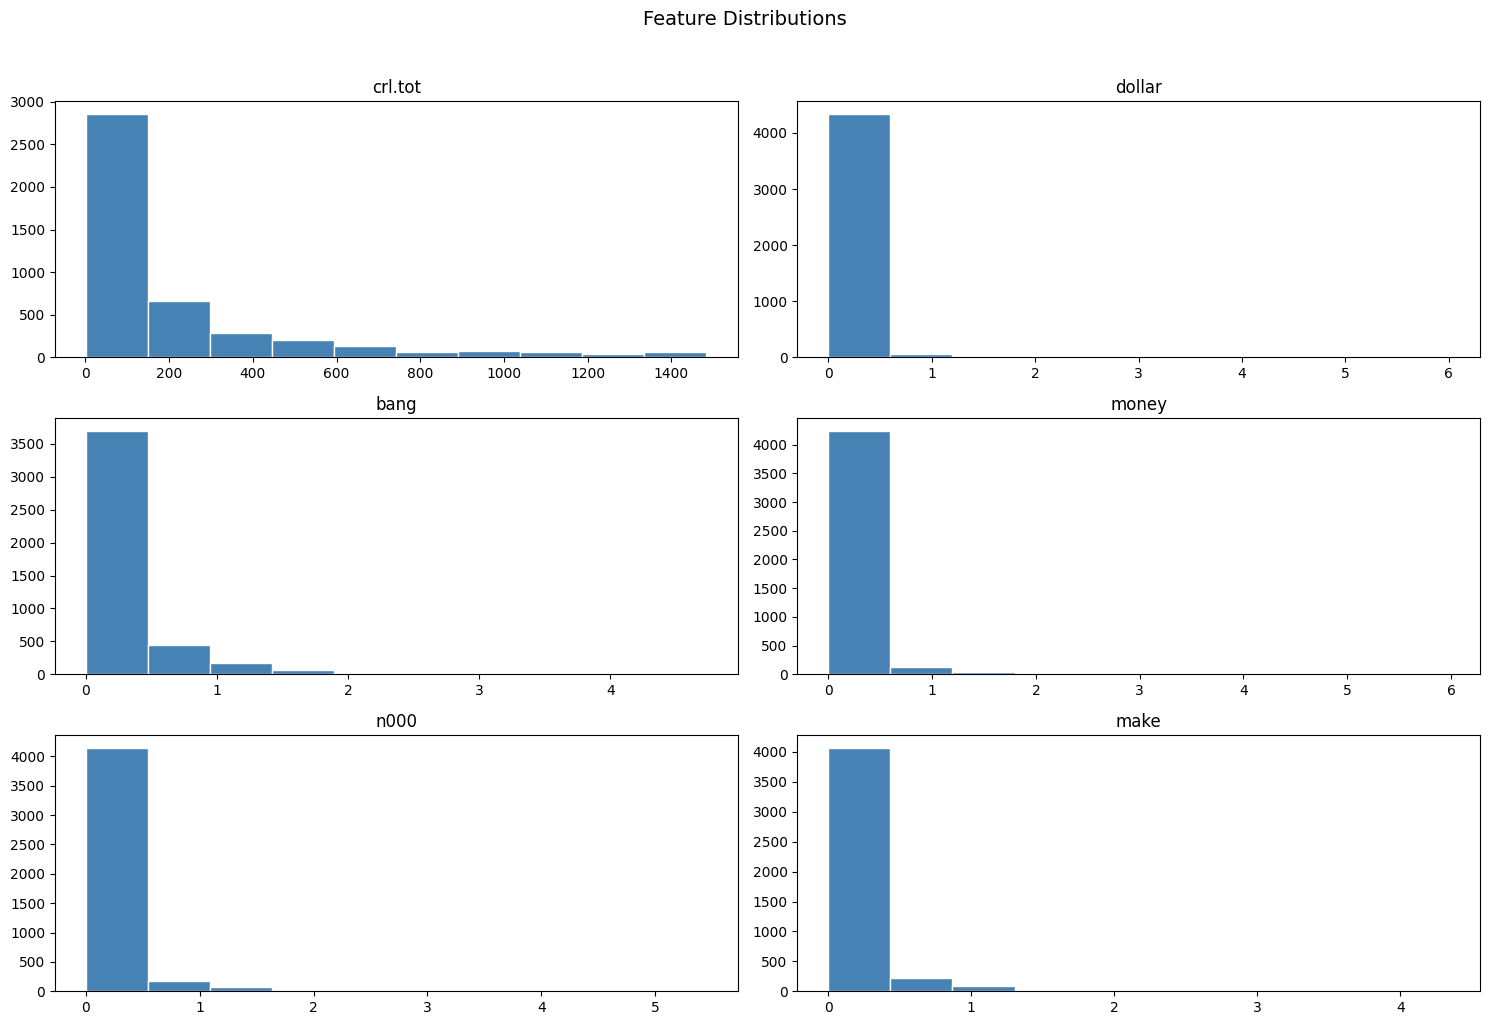

In [10]:
# Check for outliers 

df.drop(columns='yesno').hist(
    figsize=(15, 10),          
    color='steelblue',        
    edgecolor='white',         
    grid=False,                
)

plt.suptitle('Feature Distributions', y=1.02, fontsize=14)  
plt.tight_layout()      
plt.show()

# Feature means based on the target field

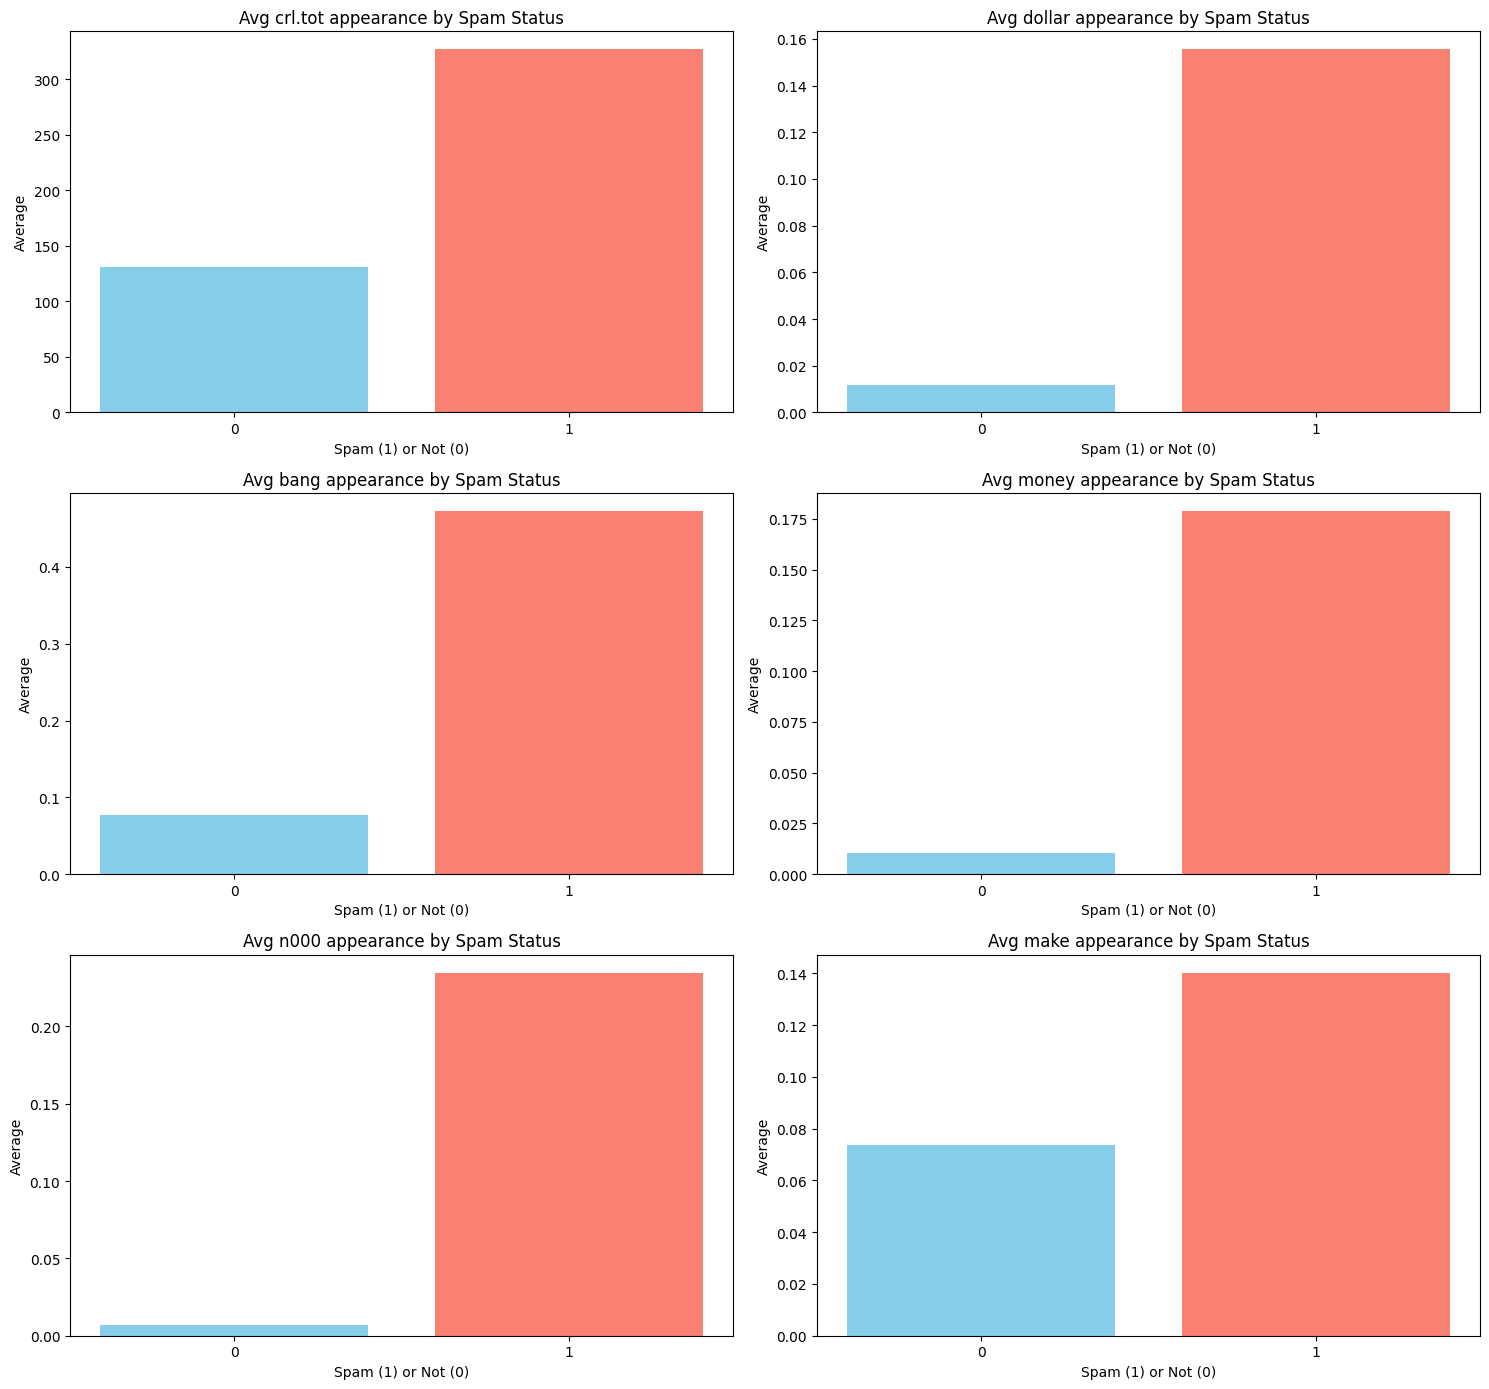

In [13]:
import matplotlib.pyplot as plt

cols = df.columns[:-1]  # Exclude 'yesno' column
n_plots = len(cols)
n_cols = 2
n_rows = (n_plots + 1) // n_cols  # Ensure enough rows

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 14))
ax = ax.flatten()  # Flatten in case of multiple rows

for i in range(n_plots):
    group = df.groupby('yesno')[cols[i]].mean()
    ax[i].bar(group.index.astype(str), group.values, color=['skyblue', 'salmon'])
    ax[i].set_title(f'Avg {cols[i]} appearance by Spam Status')
    ax[i].set_xlabel('Spam (1) or Not (0)')
    ax[i].set_ylabel('Average')

# Hide unused subplots if any
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


**From the above plot we can say that the emails which contain a high number of `$, !, '000', 'make', 'money', 'bang'` are spam emails**

<Axes: >

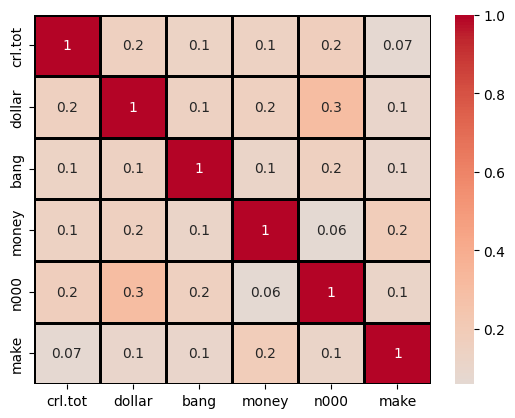

In [12]:
# Let check for correlation 

sns.heatmap(df.drop('yesno', axis=1).corr(),
           annot=True,
           fmt='.1g',
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black') 

No values are correlated we are good to go

# Logistic Regression Prep

# Prepare X and y

In [13]:
y = df.yesno
X = df.iloc[:, :-1]

# add constant
X = sm.add_constant(X)
X.head(2)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


# Train and test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

# Train the model

In [15]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8


In [16]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.4210
Time:                        22:12:32   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.000      8.985      0.000       0.001       0.002
dollar         6.5798      0.682      9.652      0.0

# Assess the model

In [17]:
# Predictions
prediction = model.predict(X_test)
prediction = np.where(prediction > 0.5, 1, 0)
prediction[:2]

array([1, 0])

In [18]:
y_test.mean()  # if < 0.3 then unbalanced

0.35400225479143177

# Confusion Matrix

In [19]:
# confusion matrix 
print(confusion_matrix(y_test, prediction))
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()


[[524  49]
 [102 212]]


# Classification Report 

In [20]:
def logit_eval(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score2 = (2 * tp) / (2 * tp + fp + fn)

    evals = [accuracy, precision, recall, f1_score, f1_score2, specificity]
    evals_str = ['accuracy', 'precision', 'recall(sensitivity)', 'f1_score', 'f1_score2', 'specificity']

    for i in range(len(evals)):
        print(f'Evaluation metric {evals_str[i]}: {round(evals[i] * 100, 2)}%')

In [21]:
logit_eval(tn, fp, fn, tp)

Evaluation metric accuracy: 82.98%
Evaluation metric precision: 81.23%
Evaluation metric recall(sensitivity): 67.52%
Evaluation metric f1_score: 73.74%
Evaluation metric f1_score2: 73.74%
Evaluation metric specificity: 91.45%


In [22]:
# classification report 

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

